In [ ]:
#Fraud Detection

In [4]:
import numpy as np #matrixes
import sklearn as sk #prediction models
import pandas as pd #data processing
import matplotlib.pyplot as plt #plot graphs
from sklearn.preprocessing import scale
import random
import seaborn as sns #interactive graphs
import matplotlib.gridspec as gridspec

In [6]:
df = pd.read_csv('Desktop/Machine Learning Course/Week 3 - Cybersecurity/creditcard.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,142389.0,1.673840,0.175584,-0.899625,3.708720,0.578195,0.481916,0.285482,0.093939,-1.146401,...,-0.121646,-0.639110,0.245890,0.627108,-0.239727,-0.324313,-0.068396,-0.032118,113.49,0
1,157276.0,2.046107,-0.041995,-1.190372,1.618291,0.635929,0.703000,-0.213915,0.076879,-0.615218,...,-0.019431,0.070167,0.095519,-0.012371,-0.225932,2.338525,-0.203003,-0.096692,3.77,0
2,88656.0,0.011417,-0.823494,1.523606,0.289637,-0.610877,2.188941,-0.398876,0.312244,-0.168993,...,0.045797,0.918665,0.380836,-0.218477,-1.341427,-0.582036,0.229323,0.092799,163.54,0
3,36245.0,-0.969752,-0.044376,0.158949,-1.327086,1.267115,-0.165153,1.231352,-0.016042,-0.766214,...,0.081947,-0.267799,-0.099588,-1.358085,0.436492,1.006853,-0.123980,0.064261,144.00,0
4,165908.0,-0.978569,1.334184,-0.022230,-0.220401,1.433877,-0.849251,1.203028,0.171948,-1.293736,...,0.074968,-0.069891,-0.486426,0.597117,1.361444,-0.576527,-0.220204,-0.180423,1.00,0


In [12]:
#Check the amounts of fraudulant and normal transactions
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


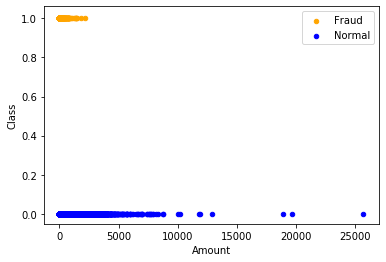

In [13]:
# Scatter plot to see the 'Amounts' relation between the Fraud and Normal transactions
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label = 'Normal', ax=ax)
plt.show()

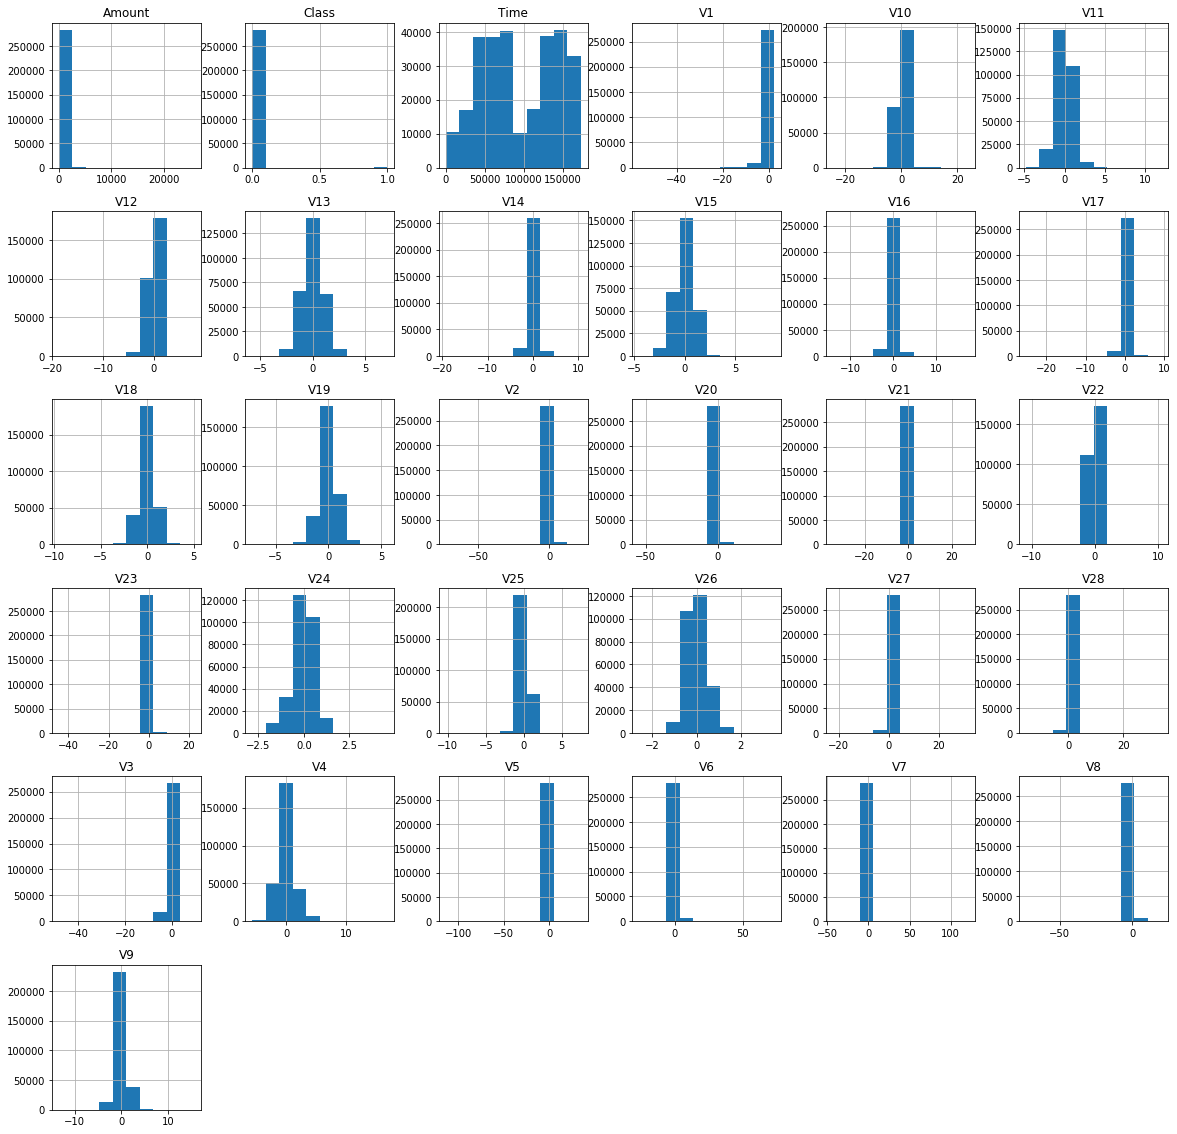

In [8]:
# Plot all features using the histograms
df.hist(figsize=(20,20))
plt.show()

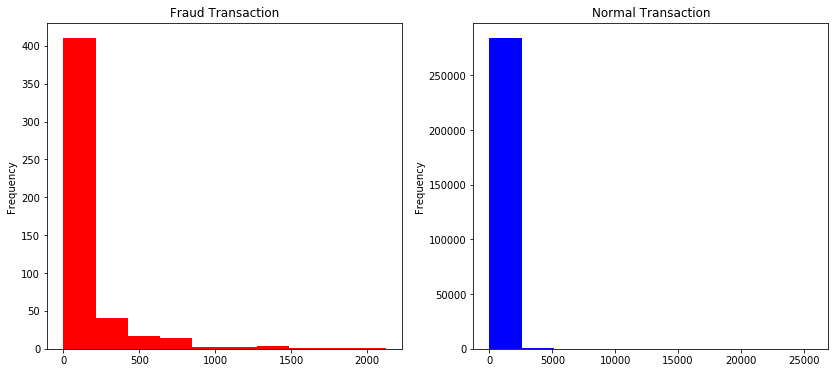

In [14]:
#Plot the dollar 'Amount' to see the relation between normal and fraud transactions
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
fraud.Amount.plot.hist(title="Fraud Transaction" , color = 'red')
plt.subplot(1,2,2)
non_frauds.Amount.plot.hist(title="Normal Transaction", color = "blue")

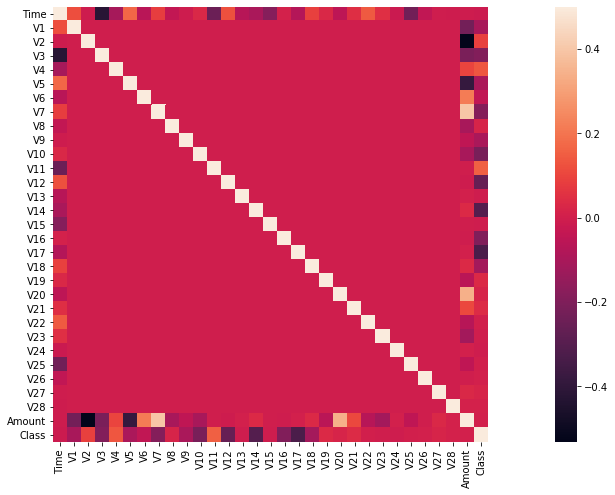

In [15]:
#Plot heatmap to see correlation between the V parameters
corr = df.corr()
fig = plt.figure(figsize = (24,8))
sns.heatmap(corr, vmax = 0.5, square = True)

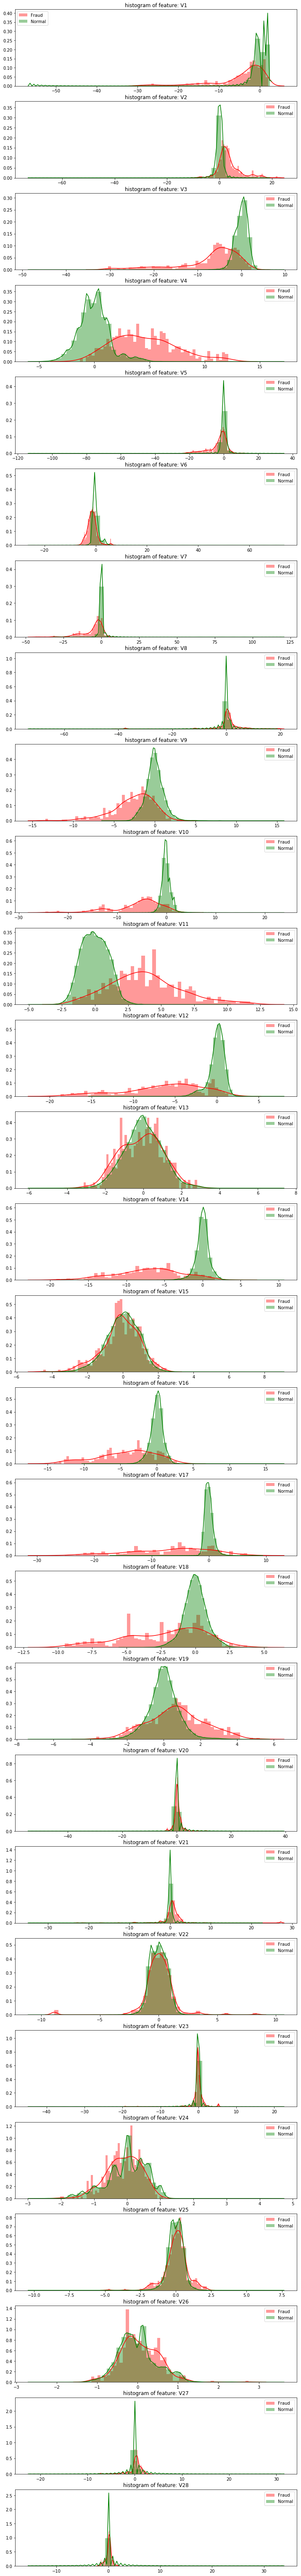

In [16]:
#get all the V features
v_features = df.iloc[:,1:29].columns
#plot histograms of the v features for fraud and normal transactions and check the differences to signify importance for inferences
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28,1)
for i, cn in enumerate(df[v_features]):
  ax = plt.subplot(gs[i])
  sns.distplot(df[cn][df.Class == 1], bins=50, label = "Fraud", color = "red")
  sns.distplot(df[cn][df.Class == 0], bins=50, label = "Normal", color = "green")
  ax.legend()
  ax.set_xlabel('')
  ax.set_title('histogram of feature: '+cn)
plt.show()

In [11]:
#Data Preprocessing 
#Drop the time column since it will not be used in the model
df = df.drop(['Time'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.655086,-0.967019,1.734176,-0.478611,-2.293438,0.980000,-0.564131,0.762367,-0.365839,0.124888,...,0.288417,0.892048,0.039519,0.003759,0.098627,0.027428,0.249856,0.024051,267.15,0
1,-1.268891,1.595688,0.850217,0.706809,0.452982,-1.147619,0.635530,0.193885,-1.077849,-1.266001,...,0.079738,0.070951,-0.330364,0.302916,0.658149,-0.308639,-0.182455,0.032312,1.00,0
2,1.167995,-0.846283,0.460460,-0.837681,-0.876022,0.055852,-0.722799,0.109465,-0.979062,0.683787,...,0.104370,0.007769,-0.002384,-0.298683,0.161556,-0.389204,0.015331,0.023267,96.00,0
3,-0.722853,-0.275012,0.784027,-0.916729,0.183612,1.171599,0.867672,0.243502,0.827420,-1.304732,...,0.406522,1.236187,-0.162213,-1.320642,0.360888,-0.055729,0.122886,0.156405,193.64,0
4,1.258252,0.381086,0.313977,0.689615,-0.341719,-1.065900,0.107834,-0.222254,-0.017066,-0.291884,...,-0.284366,-0.802556,0.126229,0.354302,0.227496,0.093400,-0.020760,0.031373,0.89,0


In [17]:
#Machine Learning imports

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
#Create x and y variables using the features and the class column
x = df.iloc[:, :-1]
y = df['Class']
print(x.shape)
print(y.shape)

#Standardize the data so that it is at the same scale and it is normally distributed for better prediction
scaler = StandardScaler()
scaler.fit(x)

#Split the data using 'train_test_split' function
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3)

(284807, 30)
(284807,)


In [19]:
#Logistic Regression model 
# create and configure model
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print('Score:', (logistic.score(X_test, y_test))*100,"%")

C:\Users\xmagn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 99.89817773252344 %


In [20]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]


In [21]:
#Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.72      0.59      0.65       137

    accuracy                           1.00     85443
   macro avg       0.86      0.80      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [22]:
print(y_predicted)

[0 0 0 ... 0 0 0]


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_predicted.round()))

[[85275    31]
 [   56    81]]


In [24]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
# train model
rforest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
#predict on test set 
rforest_pred = rforest.predict(X_test)
print(rforest_pred)

[0 0 0 ... 0 0 0]


In [25]:
print(confusion_matrix(y_test, rforest_pred.round()))

[[85300     6]
 [   39    98]]


In [26]:
#39 False Positive from the random forest classifier compared to the 56 from logistic regression. Random Forest Classifier is better in this situation.

In [27]:
#Oversampling to handle imbalanced datasets
from sklearn.utils import resample

#Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

#separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

#upsample minority
fraud_upsampled = resample(fraud, 
                           replace=True, #sample with replacement
                           n_samples=len(not_fraud), #match number in majority class
                           random_state=27) #reproducible results

# combine majority and unsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

#check new class counts
upsampled.Class.value_counts()                       

1    199009
0    199009
Name: Class, dtype: int64

In [28]:
#try logistic regression with balanced dataset
from sklearn.linear_model import LogisticRegression
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)
upsampled_lr = LogisticRegression().fit(X_train, y_train)
upsampled_pred = upsampled_lr.predict(X_test)

C:\Users\xmagn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
print(confusion_matrix(y_test, upsampled_pred.round()))

[[82717  2589]
 [   14   123]]


In [30]:
#try Random Forest Classifier
upsampled_rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
#Predict on Test Set
upsampled_rf_pred = upsampled_rf.predict(X_test)

In [31]:
print(confusion_matrix(y_test, upsampled_rf_pred.round()))

[[85299     7]
 [   45    92]]


In [34]:
#Using the Over-samping, the logistic regression classifier seems to do better as there are 14 false positives in comparison to 45 for the Random Forest classifier. This is also much better than without over-sampling.